# Ionosphere Machine Learning

# Library Used

In [522]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, BatchNormalization, Dropout, LeakyReLU, ELU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Load Data and Data Exploration


In [544]:
df = pd.read_csv('ionosphere.csv')
df.head(100)


,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0.79157,0.16851,0.00000,0.00000,0.56541,0.06874,0.39468,1.00000,...,0.80710,-0.34146,0.88248,-1.00000,0.69401,-1.00000,0.12860,0.00000,0.00000,b
96,1,0,0.90116,0.16607,0.79299,0.37379,0.72990,0.50515,0.59784,0.72997,...,0.39951,-0.71844,0.25835,-0.72369,0.11218,-0.71475,-0.05525,-0.67699,-0.19904,g
97,1,0,0.97714,0.19049,0.82683,0.46259,0.71771,0.58732,0.47968,0.84278,...,0.17849,-0.83314,-0.01358,-0.82366,-0.19321,-0.67289,-0.33662,-0.59943,-0.49700,g
98,1,0,-1.00000,-1.00000,0.00000,0.00000,0.50814,-0.78502,0.60586,0.32899,...,-0.59609,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000,b


In [545]:
x = pd.get_dummies(df.drop(['class'], axis=1))
x.head(100)

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0.79157,0.16851,0.00000,0.00000,0.56541,0.06874,0.39468,1.00000,...,-0.91574,0.80710,-0.34146,0.88248,-1.00000,0.69401,-1.00000,0.12860,0.00000,0.00000
96,1,0,0.90116,0.16607,0.79299,0.37379,0.72990,0.50515,0.59784,0.72997,...,-0.68159,0.39951,-0.71844,0.25835,-0.72369,0.11218,-0.71475,-0.05525,-0.67699,-0.19904
97,1,0,0.97714,0.19049,0.82683,0.46259,0.71771,0.58732,0.47968,0.84278,...,-0.85376,0.17849,-0.83314,-0.01358,-0.82366,-0.19321,-0.67289,-0.33662,-0.59943,-0.49700
98,1,0,-1.00000,-1.00000,0.00000,0.00000,0.50814,-0.78502,0.60586,0.32899,...,1.00000,-0.59609,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000


In [546]:
y = df['class'].apply(lambda x: 1 if x == 'g' else 0)
y.head(100)

0     1
1     0
2     1
3     0
4     1
     ..
95    0
96    1
97    1
98    0
99    1
Name: class, Length: 100, dtype: int64

- Identify the number of inputs and outputs

In [524]:
num_inputs = 34
num_outputs = 2

# Preprocess the data

In [525]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
y_encoded = to_categorical(y, num_classes=num_outputs)

# Partition into training and testing sets

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize necessary parameters

In [527]:
learning_rate = 0.001
dropout_rate = 0.5
hidden_layers = [64, 32]  # Two hidden layers with 64 and 32 nodes respectively
max_epochs = 100
max_error = 0.01

# Design and train the hybrid neural network

In [528]:
model1 = Sequential()

- Convolutional Neural Network (CNN) component

In [529]:
model1.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())


- Feedforward Neural Network (FNN) component

In [530]:
model1.add(Dense(hidden_layers[0], activation='relu'))
model1.add(Dropout(dropout_rate)) 
model1.add(Dense(hidden_layers[1], activation='relu'))
model1.add(Dropout(dropout_rate)) 
model1.add(Dense(num_outputs, activation='softmax'))

- Apply enhancements


In [548]:
adam = Adam(learning_rate=learning_rate)
model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model1.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], validation_data=(X_test, y_test))

Epoch 1/100


9/9 [==============================] - 1s 24ms/step - loss: 0.0515 - accuracy: 0.9893 - val_loss: 0.1910 - val_accuracy: 0.9718
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.3310 - val_accuracy: 0.9577
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0301 - accuracy: 0.9929 - val_loss: 0.2154 - val_accuracy: 0.9437
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0243 - accuracy: 0.9964 - val_loss: 0.1356 - val_accuracy: 0.9577
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0570 - accuracy: 0.9893 - val_loss: 0.0858 - val_accuracy: 0.9859
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0573 - accuracy: 0.9893 - val_loss: 0.0842 - val_accuracy: 0.9718
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0398 - accuracy: 0.9929 - val_loss: 0.2162 - val_accuracy: 0.9437
Epoch 8/100
9/9 [=====================

# Testing and evaluate model

In [405]:
loss, accuracy = model1.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9718


# Making Prediction for each models

In [406]:
def evaluate_prediction(pred_conf, actual_results):
    pred_out = [np.argmax(conf) for conf in pred_conf]
    r_list = [pred == actual for pred, actual in zip(pred_out, actual_results)]
    for i, (pred, actual, r) in enumerate(zip(pred_out, actual_results, r_list)):
        _r = "correct" if r else "wrong"
        print(f"[{str(i).zfill(len(str(len(pred_out))))}]: {pred=}, {actual=} = {_r}")
    print(f"\nCorrects: {r_list.count(True)}    Wrongs: {r_list.count(False)}")
    return r_list

all_model_result = []

- Making prediction 

In [407]:
pred_model1 = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])
pred1 = pred_model1.predict(X_test)

3/3 [==============================] - 0s 1ms/step


- Result prediction

In [408]:
all_model_result = []
all_model_result.append(evaluate_prediction(pred1, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=0, actual=0 = correct
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1

## Model 1
- ReLU (Rectified Linear Unit) activation function

In [409]:
model1 = Sequential()

model1.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())

model1.add(Dense(hidden_layers[0], activation='relu'))
model1.add(Dropout(dropout_rate)) 
model1.add(Dense(hidden_layers[1], activation='relu'))
model1.add(Dropout(dropout_rate)) 
model1.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model1.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/100


9/9 [==============================] - 1s 21ms/step - loss: 0.6735 - accuracy: 0.6786 - val_loss: 0.6505 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.7571 - val_loss: 0.6392 - val_accuracy: 0.6056
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4417 - accuracy: 0.8036 - val_loss: 0.6321 - val_accuracy: 0.6056
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3884 - accuracy: 0.8393 - val_loss: 0.6201 - val_accuracy: 0.6338
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2889 - accuracy: 0.9000 - val_loss: 0.6056 - val_accuracy: 0.6620
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2374 - accuracy: 0.9000 - val_loss: 0.5941 - val_accuracy: 0.6479
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2287 - accuracy: 0.9286 - val_loss: 0.5808 - val_accuracy: 0.6479
Epoch 8/100
9/9 [=====================

- Testing model 1

In [410]:
loss, accuracy = model1.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.1591 - accuracy: 0.9437


## Model 2
- Leaky ReLU activation function

In [411]:
model2 = Sequential()

model2.add(Conv1D(32, kernel_size=3, input_shape=(num_inputs, 1)))
model2.add(LeakyReLU(alpha=0.2))  
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())

model2.add(Dense(hidden_layers[0]))
model2.add(LeakyReLU(alpha=0.2))  
model2.add(Dropout(dropout_rate))
model2.add(Dense(hidden_layers[1]))
model2.add(LeakyReLU(alpha=0.2))  
model2.add(Dropout(dropout_rate))
model2.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model2.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 19ms/step - loss: 0.7901 - accuracy: 0.6464 - val_loss: 0.6595 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5137 - accuracy: 0.7964 - val_loss: 0.6493 - val_accuracy: 0.6056
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3622 - accuracy: 0.8536 - val_loss: 0.6347 - val_accuracy: 0.6479
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.9000 - val_loss: 0.6178 - val_accuracy: 0.6479
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.9286 - val_loss: 0.6019 - val_accuracy: 0.6479
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2054 - accuracy: 0.9250 - val_loss: 0.5837 - val_accuracy: 0.6620
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1633 - accuracy: 0.9536 - val_loss: 0.5669 - val_accuracy: 0.7465
Epoch 8/100
9/9 [=========

- Testing model 2

In [412]:
loss, accuracy = model2.evaluate(X_test, y_test)

1/3 [=========>....................] - ETA: 0s - loss: 0.0785 - accuracy: 0.9688

3/3 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9718


## Model 3
- ELU (Exponential Linear Unit) activation function

In [413]:
model3 = Sequential()

model3.add(Conv1D(32, kernel_size=3, input_shape=(num_inputs, 1)))
model3.add(ELU(alpha=1.0)) 
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())

model3.add(Dense(hidden_layers[0]))
model3.add(ELU(alpha=1.0)) 
model3.add(Dropout(dropout_rate))
model3.add(Dense(hidden_layers[1]))
model3.add(ELU(alpha=1.0)) 
model3.add(Dropout(dropout_rate))
model3.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model3.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/100


9/9 [==============================] - 1s 20ms/step - loss: 0.8987 - accuracy: 0.7071 - val_loss: 0.6677 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4969 - accuracy: 0.7821 - val_loss: 0.7325 - val_accuracy: 0.6056
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.8393 - val_loss: 0.6639 - val_accuracy: 0.6056
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3282 - accuracy: 0.8893 - val_loss: 0.6179 - val_accuracy: 0.6056
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.8857 - val_loss: 0.6255 - val_accuracy: 0.6056
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.9036 - val_loss: 0.5951 - val_accuracy: 0.6338
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1871 - accuracy: 0.9143 - val_loss: 0.5859 - val_accuracy: 0.6479
Epoch 8/100
9/9 [=====================

- Testing model 3

In [414]:
loss, accuracy = model3.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9577


## Model 4
- Adam optimizer

In [415]:
model4 = Sequential()

model4.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())

model4.add(Dense(hidden_layers[0], activation='relu'))
model4.add(Dropout(dropout_rate)) 
model4.add(Dense(hidden_layers[1], activation='relu'))
model4.add(Dropout(dropout_rate)) 
model4.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model4.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/100


9/9 [==============================] - 1s 21ms/step - loss: 0.9249 - accuracy: 0.6214 - val_loss: 0.6485 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.7429 - val_loss: 0.6446 - val_accuracy: 0.6056
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4281 - accuracy: 0.7893 - val_loss: 0.6345 - val_accuracy: 0.6056
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.8107 - val_loss: 0.6244 - val_accuracy: 0.6197
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3768 - accuracy: 0.8107 - val_loss: 0.6175 - val_accuracy: 0.6620
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.8893 - val_loss: 0.6017 - val_accuracy: 0.6620
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.9000 - val_loss: 0.5833 - val_accuracy: 0.7042
Epoch 8/100
9/9 [=====================

- Testing model 4

In [416]:
loss, accuracy = model4.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9577


## Model 5
- RMSprop optimizer

In [417]:
model5 = Sequential()

model5.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))
model5.add(Flatten())

model5.add(Dense(hidden_layers[0], activation='relu'))
model5.add(Dropout(dropout_rate)) 
model5.add(Dense(hidden_layers[1], activation='relu'))
model5.add(Dropout(dropout_rate)) 
model5.add(Dense(num_outputs, activation='softmax'))

rmsprop = RMSprop(learning_rate=learning_rate)
model5.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model5.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 0.6782 - accuracy: 0.7500 - val_loss: 0.6299 - val_accuracy: 0.6338
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4880 - accuracy: 0.8321 - val_loss: 0.6225 - val_accuracy: 0.6901
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8500 - val_loss: 0.6009 - val_accuracy: 0.7183
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2697 - accuracy: 0.8714 - val_loss: 0.5681 - val_accuracy: 0.7606
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3138 - accuracy: 0.8750 - val_loss: 0.5652 - val_accuracy: 0.8873
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2153 - accuracy: 0.9179 - val_loss: 0.5395 - val_accuracy: 0.9155
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.9071 - val_loss: 0.5361 - val_accuracy: 0.8028
Epoch 8/100
9/9 [=========

- Testing model 5

In [418]:
loss, accuracy = model5.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9718


## Model 6
- SGD (Stochastic Gradient Descent) optimizer

In [419]:
model6 = Sequential()

model6.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))
model6.add(Flatten())

model6.add(Dense(hidden_layers[0], activation='relu'))
model6.add(Dropout(dropout_rate)) 
model6.add(Dense(hidden_layers[1], activation='relu'))
model6.add(Dropout(dropout_rate)) 
model6.add(Dense(num_outputs, activation='softmax'))

sgd = SGD(learning_rate=learning_rate)
model6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model6.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/100


9/9 [==============================] - 1s 19ms/step - loss: 0.9190 - accuracy: 0.4321 - val_loss: 0.7010 - val_accuracy: 0.3803
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8896 - accuracy: 0.5000 - val_loss: 0.6994 - val_accuracy: 0.3521
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8605 - accuracy: 0.5107 - val_loss: 0.6983 - val_accuracy: 0.2958
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8110 - accuracy: 0.5643 - val_loss: 0.6971 - val_accuracy: 0.3099
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8118 - accuracy: 0.5286 - val_loss: 0.6961 - val_accuracy: 0.3944
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7900 - accuracy: 0.5036 - val_loss: 0.6942 - val_accuracy: 0.5070
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7643 - accuracy: 0.5429 - val_loss: 0.6927 - val_accuracy: 0.5775
Epoch 8/100
9/9 [=====================

- Testing model 6

In [420]:
loss, accuracy = model6.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.9296


## Model 7
- 50 Epochs

In [421]:
max_epochs = 50

model7 = Sequential()

model7.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))
model7.add(Flatten())

model7.add(Dense(hidden_layers[0], activation='relu'))
model7.add(Dropout(dropout_rate)) 
model7.add(Dense(hidden_layers[1], activation='relu'))
model7.add(Dropout(dropout_rate)) 
model7.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model7.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model7.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/50


9/9 [==============================] - 1s 20ms/step - loss: 0.6384 - accuracy: 0.6893 - val_loss: 0.6482 - val_accuracy: 0.6056
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4831 - accuracy: 0.7750 - val_loss: 0.6397 - val_accuracy: 0.6056
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.3862 - accuracy: 0.8250 - val_loss: 0.6287 - val_accuracy: 0.6338
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 0.8750 - val_loss: 0.6188 - val_accuracy: 0.7183
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.8786 - val_loss: 0.5841 - val_accuracy: 0.7324
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.2272 - accuracy: 0.9214 - val_loss: 0.5715 - val_accuracy: 0.7465
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.2347 - accuracy: 0.9071 - val_loss: 0.5510 - val_accuracy: 0.8028
Epoch 8/50
9/9 [============================

- Testing model 7

In [422]:
loss, accuracy = model7.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9155


## Model 8
- 100 Epochs

In [423]:
max_epochs = 100

model8 = Sequential()

model8.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model8.add(BatchNormalization())
model8.add(MaxPooling1D(pool_size=2))
model8.add(Flatten())

model8.add(Dense(hidden_layers[0], activation='relu'))
model8.add(Dropout(dropout_rate)) 
model8.add(Dense(hidden_layers[1], activation='relu'))
model8.add(Dropout(dropout_rate)) 
model8.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model8.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model8.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 2s 22ms/step - loss: 0.7323 - accuracy: 0.6357 - val_loss: 0.6534 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5662 - accuracy: 0.7000 - val_loss: 0.6545 - val_accuracy: 0.6197
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4591 - accuracy: 0.7750 - val_loss: 0.6383 - val_accuracy: 0.6197
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.8357 - val_loss: 0.6243 - val_accuracy: 0.6197
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3672 - accuracy: 0.8786 - val_loss: 0.6066 - val_accuracy: 0.6479
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.8821 - val_loss: 0.5918 - val_accuracy: 0.6761
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.9071 - val_loss: 0.5911 - val_accuracy: 0.7042
Epoch 8/100
9/9 [=========

- Testing model 8

In [424]:
loss, accuracy = model8.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9718


## Model 9
- 200 Epochs

In [425]:
max_epochs = 200

model9 = Sequential()

model9.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model9.add(BatchNormalization())
model9.add(MaxPooling1D(pool_size=2))
model9.add(Flatten())

model9.add(Dense(hidden_layers[0], activation='relu'))
model9.add(Dropout(dropout_rate)) 
model9.add(Dense(hidden_layers[1], activation='relu'))
model9.add(Dropout(dropout_rate)) 
model9.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model9.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model9.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
           validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 21ms/step - loss: 0.8152 - accuracy: 0.5786 - val_loss: 0.6670 - val_accuracy: 0.6056
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.6679 - val_loss: 0.6518 - val_accuracy: 0.6056
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.5415 - accuracy: 0.7571 - val_loss: 0.6474 - val_accuracy: 0.6056
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.4204 - accuracy: 0.8286 - val_loss: 0.6417 - val_accuracy: 0.6338
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.3350 - accuracy: 0.8500 - val_loss: 0.6291 - val_accuracy: 0.6479
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8786 - val_loss: 0.6170 - val_accuracy: 0.6761
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2806 - accuracy: 0.9036 - val_loss: 0.6025 - val_accuracy: 0.7324
Epoch 8/200
9/9 [=========

- Testing model 9

In [426]:
loss, accuracy = model9.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9577


## Model 10
- 0.2 Dropout rate

In [427]:
max_epochs = 100
dropout_rate = 0.2

model10 = Sequential()

model10.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model10.add(BatchNormalization())
model10.add(MaxPooling1D(pool_size=2))
model10.add(Flatten())

model10.add(Dense(hidden_layers[0], activation='relu'))
model10.add(Dropout(dropout_rate)) 
model10.add(Dense(hidden_layers[1], activation='relu'))
model10.add(Dropout(dropout_rate)) 
model10.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model10.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model10.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
            validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 0.6736 - accuracy: 0.6893 - val_loss: 0.6318 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2972 - accuracy: 0.8643 - val_loss: 0.6039 - val_accuracy: 0.6620
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2278 - accuracy: 0.9214 - val_loss: 0.5839 - val_accuracy: 0.6620
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.9179 - val_loss: 0.5773 - val_accuracy: 0.8028
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1787 - accuracy: 0.9393 - val_loss: 0.5564 - val_accuracy: 0.7606
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1687 - accuracy: 0.9393 - val_loss: 0.5481 - val_accuracy: 0.8310
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1184 - accuracy: 0.9607 - val_loss: 0.5240 - val_accuracy: 0.8028
Epoch 8/100
9/9 [=========

- Testing model 10

In [428]:
loss, accuracy = model10.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9014


## Model 11
- 0.3 Dropout rate

In [429]:
dropout_rate = 0.3

model11 = Sequential()

model11.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model11.add(BatchNormalization())
model11.add(MaxPooling1D(pool_size=2))
model11.add(Flatten())

model11.add(Dense(hidden_layers[0], activation='relu'))
model11.add(Dropout(dropout_rate)) 
model11.add(Dense(hidden_layers[1], activation='relu'))
model11.add(Dropout(dropout_rate)) 
model11.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model11.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model11.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
            validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 19ms/step - loss: 0.7247 - accuracy: 0.6714 - val_loss: 0.6407 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4202 - accuracy: 0.8036 - val_loss: 0.6368 - val_accuracy: 0.6620
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.8750 - val_loss: 0.6120 - val_accuracy: 0.6761
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2519 - accuracy: 0.9107 - val_loss: 0.5916 - val_accuracy: 0.8028
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2155 - accuracy: 0.9321 - val_loss: 0.5735 - val_accuracy: 0.8310
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1952 - accuracy: 0.9321 - val_loss: 0.5505 - val_accuracy: 0.9014
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1596 - accuracy: 0.9536 - val_loss: 0.5577 - val_accuracy: 0.9718
Epoch 8/100
9/9 [=========

- Testing model 11

In [430]:
loss, accuracy = model11.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9577


## Model 12
- 0.5 Dropout rate

In [431]:
dropout_rate = 0.5

model12 = Sequential()

model12.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model12.add(BatchNormalization())
model12.add(MaxPooling1D(pool_size=2))
model12.add(Flatten())

model12.add(Dense(hidden_layers[0], activation='relu'))
model12.add(Dropout(dropout_rate)) 
model12.add(Dense(hidden_layers[1], activation='relu'))
model12.add(Dropout(dropout_rate)) 
model12.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model12.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model12.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
            validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 0.8785 - accuracy: 0.5750 - val_loss: 0.6534 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5433 - accuracy: 0.7500 - val_loss: 0.6463 - val_accuracy: 0.6056
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4493 - accuracy: 0.8071 - val_loss: 0.6379 - val_accuracy: 0.6056
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3831 - accuracy: 0.8214 - val_loss: 0.6257 - val_accuracy: 0.6056
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3438 - accuracy: 0.8357 - val_loss: 0.6164 - val_accuracy: 0.6197
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.8571 - val_loss: 0.6040 - val_accuracy: 0.6479
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2987 - accuracy: 0.8714 - val_loss: 0.5882 - val_accuracy: 0.6620
Epoch 8/100
9/9 [=========

- Testing model 12

In [432]:
loss, accuracy = model12.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9718


## Model 13
- 0.001 Learning Rate

In [433]:
learning_rate = 0.001

model13 = Sequential()

model13.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model13.add(BatchNormalization())
model13.add(MaxPooling1D(pool_size=2))
model13.add(Flatten())

model13.add(Dense(hidden_layers[0], activation='relu'))
model13.add(Dropout(dropout_rate)) 
model13.add(Dense(hidden_layers[1], activation='relu'))
model13.add(Dropout(dropout_rate)) 
model13.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model13.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model13.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
            validation_data=(X_test, y_test))

Epoch 1/100


9/9 [==============================] - 1s 21ms/step - loss: 0.7482 - accuracy: 0.6821 - val_loss: 0.6391 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5619 - accuracy: 0.6964 - val_loss: 0.6281 - val_accuracy: 0.6479
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4244 - accuracy: 0.8143 - val_loss: 0.6080 - val_accuracy: 0.6479
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3534 - accuracy: 0.8893 - val_loss: 0.5928 - val_accuracy: 0.6479
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2785 - accuracy: 0.8929 - val_loss: 0.5885 - val_accuracy: 0.8028
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2819 - accuracy: 0.9036 - val_loss: 0.5600 - val_accuracy: 0.7465
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2455 - accuracy: 0.9143 - val_loss: 0.5553 - val_accuracy: 0.7746
Epoch 8/100
9/9 [=====================

- Testing model 13

In [434]:
loss, accuracy = model13.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9437


## Model 14
- 0.01 Learning Rate

In [435]:
learning_rate = 0.01

model14 = Sequential()

model14.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model14.add(BatchNormalization())
model14.add(MaxPooling1D(pool_size=2))
model14.add(Flatten())

model14.add(Dense(hidden_layers[0], activation='relu'))
model14.add(Dropout(dropout_rate)) 
model14.add(Dense(hidden_layers[1], activation='relu'))
model14.add(Dropout(dropout_rate)) 
model14.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model14.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model14.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
            validation_data=(X_test, y_test))

Epoch 1/100


9/9 [==============================] - 1s 26ms/step - loss: 0.7401 - accuracy: 0.6964 - val_loss: 0.6295 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5078 - accuracy: 0.8321 - val_loss: 0.5990 - val_accuracy: 0.6197
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3211 - accuracy: 0.9107 - val_loss: 0.5557 - val_accuracy: 0.7746
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2505 - accuracy: 0.8964 - val_loss: 0.5736 - val_accuracy: 0.8873
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2252 - accuracy: 0.9357 - val_loss: 0.5257 - val_accuracy: 0.7887
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1790 - accuracy: 0.9214 - val_loss: 0.5179 - val_accuracy: 0.8310
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1331 - accuracy: 0.9500 - val_loss: 0.5201 - val_accuracy: 0.8732
Epoch 8/100
9/9 [=====================

- Testing model 14

In [436]:
loss, accuracy = model14.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9718


## Model 15
- 0.0001 Learning Rate

In [437]:
learning_rate = 0.0001

model15 = Sequential()

model15.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_inputs, 1)))
model15.add(BatchNormalization())
model15.add(MaxPooling1D(pool_size=2))
model15.add(Flatten())

model15.add(Dense(hidden_layers[0], activation='relu'))
model15.add(Dropout(dropout_rate)) 
model15.add(Dense(hidden_layers[1], activation='relu'))
model15.add(Dropout(dropout_rate)) 
model15.add(Dense(num_outputs, activation='softmax'))

adam = Adam(learning_rate=learning_rate)
model15.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model15.fit(X_train, y_train, epochs=max_epochs, batch_size=32, callbacks=[early_stopping, checkpoint], 
            validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 0.9630 - accuracy: 0.3964 - val_loss: 0.6951 - val_accuracy: 0.3521
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7995 - accuracy: 0.5143 - val_loss: 0.6893 - val_accuracy: 0.6197
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7554 - accuracy: 0.5714 - val_loss: 0.6825 - val_accuracy: 0.7042
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7407 - accuracy: 0.5821 - val_loss: 0.6765 - val_accuracy: 0.6479
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7338 - accuracy: 0.5714 - val_loss: 0.6717 - val_accuracy: 0.6479
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6279 - accuracy: 0.6714 - val_loss: 0.6671 - val_accuracy: 0.6479
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6251 - accuracy: 0.6929 - val_loss: 0.6631 - val_accuracy: 0.6479
Epoch 8/100
9/9 [=========

- Testing model 15

In [438]:
loss, accuracy = model15.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9296


## Making Prediction using Model 1

In [439]:
pred_model1 = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])
pred1 = pred_model1.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [440]:
all_model_result.append(evaluate_prediction(pred1, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 2

In [441]:
pred_model2 = tf.keras.Sequential([model2, tf.keras.layers.Softmax()])
pred2 = pred_model2.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [442]:
all_model_result.append(evaluate_prediction(pred2, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=0, actual=0 = correct
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1

## Making Prediction using Model 3

In [443]:
pred_model3 = tf.keras.Sequential([model3, tf.keras.layers.Softmax()])
pred3 = pred_model3.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [444]:
all_model_result.append(evaluate_prediction(pred3, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=0, actual=1 = wrong
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=0, actual=0 = correct
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 4

In [445]:
pred_model4 = tf.keras.Sequential([model4, tf.keras.layers.Softmax()])
pred4 = pred_model4.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [446]:
all_model_result.append(evaluate_prediction(pred4, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 5

In [447]:
pred_model5 = tf.keras.Sequential([model5, tf.keras.layers.Softmax()])
pred5 = pred_model5.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [448]:
all_model_result.append(evaluate_prediction(pred5, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=0, actual=1 = wrong
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=0, actual=0 = correct
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 6

In [449]:
pred_model6 = tf.keras.Sequential([model5, tf.keras.layers.Softmax()])
pred6 = pred_model6.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [450]:
all_model_result.append(evaluate_prediction(pred6, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=0, actual=1 = wrong
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=0, actual=0 = correct
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 7

In [451]:
pred_model7 = tf.keras.Sequential([model7, tf.keras.layers.Softmax()])
pred7 = pred_model7.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [452]:
all_model_result.append(evaluate_prediction(pred7, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=1, actual=0 = wrong
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, ac

## Making Prediction using Model 8

In [453]:
pred_model8 = tf.keras.Sequential([model8, tf.keras.layers.Softmax()])
pred8 = pred_model8.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [454]:
all_model_result.append(evaluate_prediction(pred5, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=0, actual=1 = wrong
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=0, actual=0 = correct
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 9

In [455]:
pred_model9 = tf.keras.Sequential([model9, tf.keras.layers.Softmax()])
pred9 = pred_model9.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [456]:
all_model_result.append(evaluate_prediction(pred9, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 10

In [457]:
pred_model10 = tf.keras.Sequential([model10, tf.keras.layers.Softmax()])
pred10 = pred_model10.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [458]:
all_model_result.append(evaluate_prediction(pred10, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=1, actual=0 = wrong
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=1, actual=0 = wrong
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, actu

## Making Prediction using Model 11

In [459]:
pred_model11 = tf.keras.Sequential([model11, tf.keras.layers.Softmax()])
pred11 = pred_model11.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [460]:
all_model_result.append(evaluate_prediction(pred11, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 12

In [461]:
pred_model12 = tf.keras.Sequential([model12, tf.keras.layers.Softmax()])
pred12 = pred_model12.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [462]:
all_model_result.append(evaluate_prediction(pred12, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=0, actual=0 = correct
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1

## Making Prediction using Model 13

In [463]:
pred_model13 = tf.keras.Sequential([model13, tf.keras.layers.Softmax()])
pred13 = pred_model13.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [464]:
all_model_result.append(evaluate_prediction(pred13, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 14

In [465]:
pred_model14 = tf.keras.Sequential([model14, tf.keras.layers.Softmax()])
pred14 = pred_model14.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [466]:
all_model_result.append(evaluate_prediction(pred14, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, 

## Making Prediction using Model 15

In [467]:
pred_model15 = tf.keras.Sequential([model15, tf.keras.layers.Softmax()])
pred15 = pred_model15.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [468]:
all_model_result.append(evaluate_prediction(pred15, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=1, actual=0 = wrong
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=1, actual=0 = wrong
[14]: pred=1, actual=1 = correct
[15]: pred=1, actual=0 = wrong
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=1, actual=0 = wrong
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred=1, actu

# Best Model

In [480]:
correct_counts = [r.count(True) for r in all_model_result[1:]]
correct_counts

[67, 69, 68, 68, 69, 69, 65, 69, 68, 64, 68, 69, 67, 69, 66]

In [481]:
model_num = np.argmax(correct_counts) + 1
print(f"Best Model: model{model_num}")

Best Model: model2


# Worst Model

In [482]:
wrong_counts = [r.count(False) for r in all_model_result[1:]]
wrong_counts

[4, 2, 3, 3, 2, 2, 6, 2, 3, 7, 3, 2, 4, 2, 5]

In [483]:
model_num = np.argmax(wrong_counts) + 1
print(f"Worst Model: model{model_num}")

Worst Model: model10


# Graph Comparison (Accuracy)

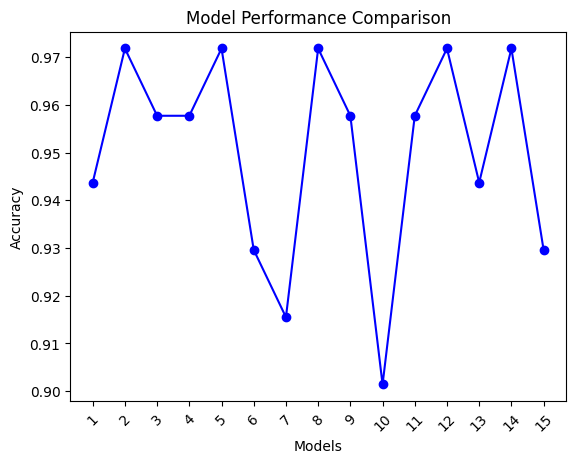

In [491]:
import matplotlib.pyplot as plt

model_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
accuracy_values = [0.9437,0.9718,0.9577,0.9577,0.9718,0.9296,0.9155,0.9718,0.9577,0.9014,0.9577,0.9718,0.9437,0.9718,0.9296]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.show()

# Graph Comparison (Correct Prediction)

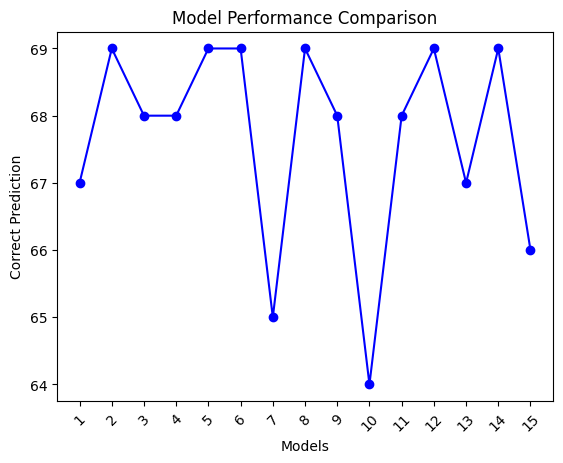

In [490]:
import matplotlib.pyplot as plt

model_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
accuracy_values = [67, 69, 68, 68, 69, 69, 65, 69, 68, 64, 68, 69, 67, 69, 66]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Correct Prediction')

plt.xticks(rotation=45)
plt.show()

# Graph Comparison (Wrong Prediction)

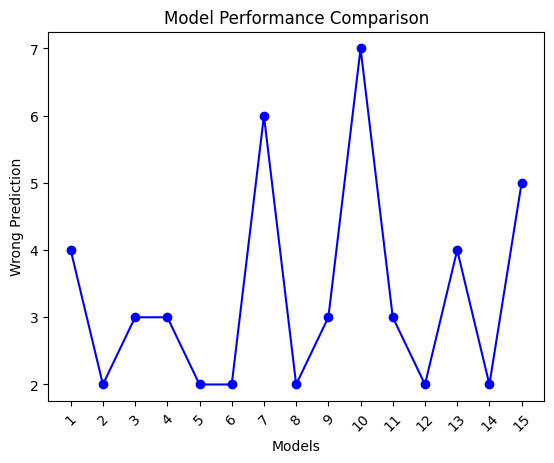

In [489]:
import matplotlib.pyplot as plt

model_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
accuracy_values = [4, 2, 3, 3, 2, 2, 6, 2, 3, 7, 3, 2, 4, 2, 5]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Wrong Prediction')

plt.xticks(rotation=45)
plt.show()

# Graph Comparison (Best Activation Function)

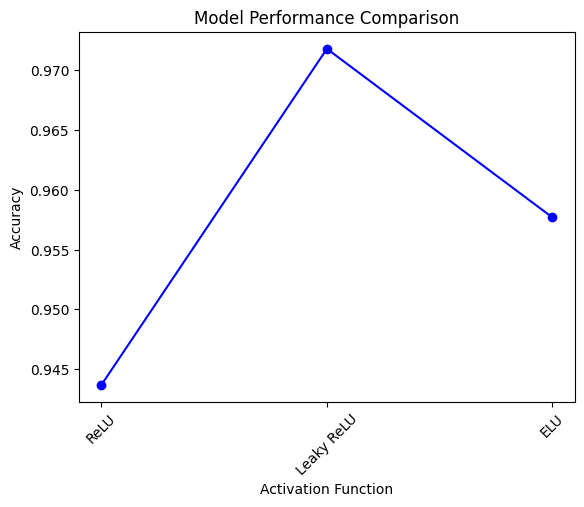

In [488]:
import matplotlib.pyplot as plt

model_names = ["ReLU", "Leaky ReLU", "ELU"]
accuracy_values = [0.9437,0.9718,0.9577]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')

plt.title('Model Performance Comparison')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.show()

# Graph Comparison (Best Optimizer)

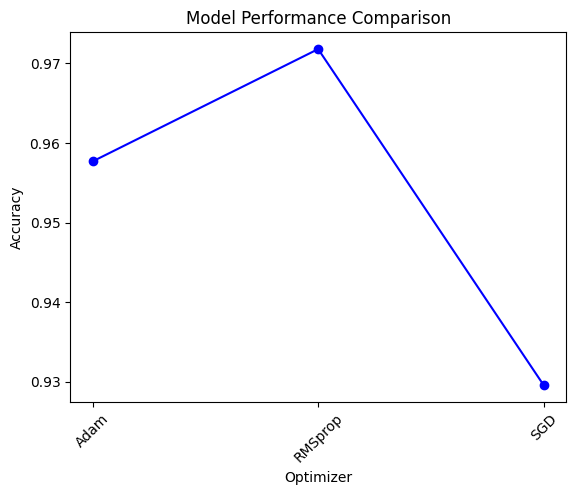

In [492]:
import matplotlib.pyplot as plt

model_names = ["Adam", "RMSprop", "SGD"]
accuracy_values = [0.9577,0.9718,0.9296]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')

plt.title('Model Performance Comparison')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.show()

# Graph Comparison (Best Epochs)

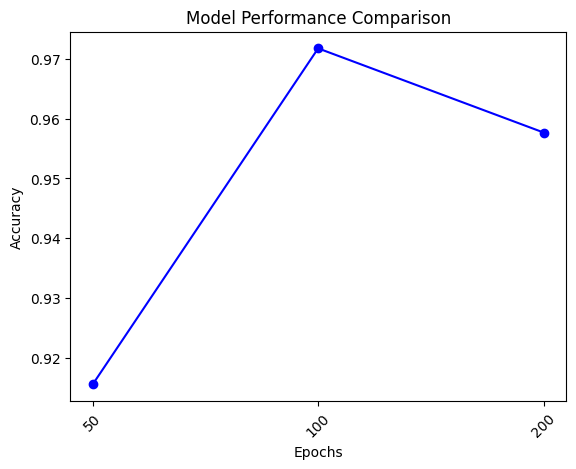

In [493]:
import matplotlib.pyplot as plt

model_names = ["50", "100", "200"]
accuracy_values = [0.9155,0.9718,0.9577]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')

plt.title('Model Performance Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.show()

# Graph Comparison (Best Dropout Rate)

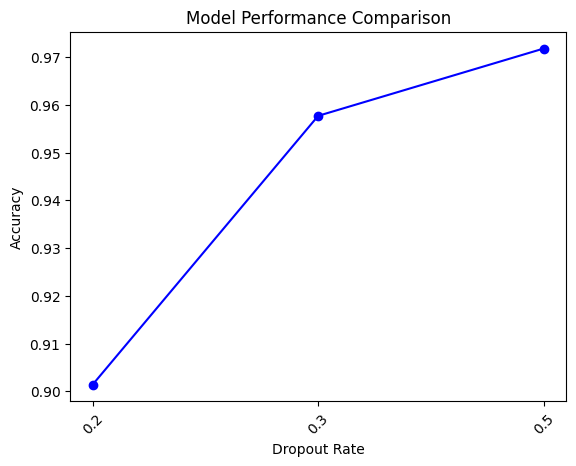

In [494]:
import matplotlib.pyplot as plt

model_names = ["0.2", "0.3", "0.5"]
accuracy_values = [0.9014,0.9577,0.9718]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')

plt.title('Model Performance Comparison')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.show()

# Graph Comparison (Best Learning Rate)

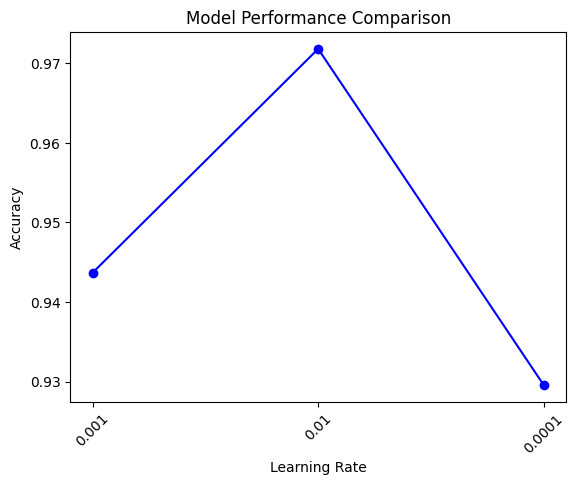

In [496]:
import matplotlib.pyplot as plt

model_names = ["0.001", "0.01", "0.0001"]
accuracy_values = [0.9437,0.9718,0.9296]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')

plt.title('Model Performance Comparison')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.show()

# The Best Model Combination Of Parameter
- LeakyReLU
- RMSprop
- 100 Epochs
- 0.5 Dropout Rate
- 0.01 Learning Rate

In [518]:
learning_rate = 0.01
max_epochs = 100
dropout_rate = 0.5

best_model = Sequential()

best_model.add(Conv1D(32, kernel_size=3, input_shape=(num_inputs, 1)))
best_model.add(LeakyReLU(alpha=0.2))  
best_model.add(BatchNormalization())
best_model.add(MaxPooling1D(pool_size=2))
best_model.add(Flatten())

best_model.add(Dense(hidden_layers[0]))
best_model.add(LeakyReLU(alpha=0.2))  
best_model.add(Dropout(dropout_rate))
best_model.add(Dense(hidden_layers[1]))
best_model.add(LeakyReLU(alpha=0.2))  
best_model.add(Dropout(dropout_rate))
best_model.add(Dense(num_outputs, activation='softmax'))

rmsprop = RMSprop(learning_rate=learning_rate)
best_model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

best_model.fit(X_train, y_train, epochs=max_epochs, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 1.8861 - accuracy: 0.7250 - val_loss: 1.1144 - val_accuracy: 0.6056
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4143 - accuracy: 0.8750 - val_loss: 1.1751 - val_accuracy: 0.6056
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.9250 - val_loss: 1.2750 - val_accuracy: 0.6056
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1876 - accuracy: 0.9393 - val_loss: 0.5964 - val_accuracy: 0.6620
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2561 - accuracy: 0.9321 - val_loss: 0.6487 - val_accuracy: 0.6197
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2333 - accuracy: 0.9214 - val_loss: 0.5890 - val_accuracy: 0.6338
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2079 - accuracy: 0.9286 - val_loss: 0.6709 - val_accuracy: 0.6338
Epoch 8/100
9/9 [=========

- Testing data of the best model

In [519]:
loss, accuracy = best_model.evaluate(X_test, y_test)

1/3 [=========>....................] - ETA: 0s - loss: 0.0115 - accuracy: 1.0000

3/3 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9859


- Making prediction of the best model

In [520]:
pred_bestmodel = tf.keras.Sequential([best_model, tf.keras.layers.Softmax()])
predBestmodel = pred_bestmodel.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [521]:
all_model_result.append(evaluate_prediction(predBestmodel, np.argmax(y_test, axis=1)))

[00]: pred=1, actual=1 = correct
[01]: pred=1, actual=1 = correct
[02]: pred=1, actual=1 = correct
[03]: pred=0, actual=0 = correct
[04]: pred=1, actual=1 = correct
[05]: pred=1, actual=1 = correct
[06]: pred=1, actual=1 = correct
[07]: pred=1, actual=1 = correct
[08]: pred=1, actual=1 = correct
[09]: pred=1, actual=1 = correct
[10]: pred=0, actual=0 = correct
[11]: pred=0, actual=0 = correct
[12]: pred=0, actual=0 = correct
[13]: pred=0, actual=0 = correct
[14]: pred=1, actual=1 = correct
[15]: pred=0, actual=0 = correct
[16]: pred=1, actual=1 = correct
[17]: pred=0, actual=0 = correct
[18]: pred=1, actual=1 = correct
[19]: pred=0, actual=0 = correct
[20]: pred=1, actual=1 = correct
[21]: pred=0, actual=0 = correct
[22]: pred=0, actual=0 = correct
[23]: pred=1, actual=1 = correct
[24]: pred=1, actual=1 = correct
[25]: pred=0, actual=0 = correct
[26]: pred=0, actual=0 = correct
[27]: pred=0, actual=0 = correct
[28]: pred=0, actual=0 = correct
[29]: pred=1, actual=1 = correct
[30]: pred